In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Carga de datos

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
cost = pd.read_csv('/datasets/costs_us.csv')

## Limpieza de datos

In [3]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
cost.info()
cost.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [6]:
#normalizaos los nombres de las columnas
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
cost.columns = cost.columns.str.lower().str.replace(' ', '_')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
#convertimos las columnas que son fechas a tipo fechas
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
cost['dt'] = pd.to_datetime(cost['dt'])
visits.info()
orders.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


## Análisis de datos

### ¿Cuántas personas lo usan cada día, semana y mes?

In [8]:
# Extraemos el mes,año y semana de la columna start_ts
visits['date'] = visits['start_ts'].dt.date
visits['start_ts_month'] = visits['start_ts'].dt.month
visits['start_ts_year'] = visits['start_ts'].dt.isocalendar().year
visits['start_ts_week'] = visits['start_ts'].dt.isocalendar().week
visits.head()


,device,end_ts,source_id,start_ts,uid,date,start_ts_month,start_ts_year,start_ts_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,12,2017,51
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2,2018,8
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,7,2017,26
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,5,2018,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,12,2017,52


In [9]:
# Contamos la cantidad de visitas por semana
visits_weekly = visits.groupby(['start_ts_year', 'start_ts_week']).size().reset_index(name='visit_count')
print(visits_weekly.head(10))
print(visits_weekly['visit_count'].mean())

   start_ts_year  start_ts_week  visit_count
0           2017             22         2309
1           2017             23         4931
2           2017             24         3214
3           2017             25         3273
4           2017             26         3514
5           2017             27         3822
6           2017             28         5105
7           2017             29         4574
8           2017             30         3072
9           2017             31         2729
6781.132075471698


In [10]:
# Contamos visitas por mes
visits_monthly = visits.groupby(['start_ts_year', 'start_ts_month']).size().reset_index(name='visit_count')
print(visits_monthly.head(10))
print(visits_monthly['visit_count'].mean())

   start_ts_year  start_ts_month  visit_count
0           2017               6        16505
1           2017               7        17828
2           2017               8        14355
3           2017               9        23907
4           2017              10        37903
5           2017              11        43969
6           2017              12        41983
7           2018               1        36939
8           2018               2        37182
9           2018               3        35679
29950.0


In [11]:
# Contar visitas por dia
visits_daily = visits.groupby('date').size().reset_index(name='visit_count')
print(visits_daily.head(10))
print(visits_daily['visit_count'].mean())



         date  visit_count
0  2017-06-01          664
1  2017-06-02          658
2  2017-06-03          477
3  2017-06-04          510
4  2017-06-05          893
5  2017-06-06          875
6  2017-06-07          788
7  2017-06-08          939
8  2017-06-09          755
9  2017-06-10          375
987.3626373626373


In [12]:
#Cuantas personas por dia
users_per_day = visits.groupby(visits['start_ts'].dt.date)['uid'].nunique().reset_index()
users_per_day.columns = ['date', 'n_users']
print(users_per_day.head(10))
print(users_per_day['n_users'].mean())

         date  n_users
0  2017-06-01      605
1  2017-06-02      608
2  2017-06-03      445
3  2017-06-04      476
4  2017-06-05      820
5  2017-06-06      797
6  2017-06-07      699
7  2017-06-08      868
8  2017-06-09      695
9  2017-06-10      350
907.9917582417582


In [13]:
#Cuantas personas por semana
users_per_week = visits.groupby(['start_ts_year', 'start_ts_week'])['uid'].nunique().reset_index()
users_per_week.columns = ['year','week' ,'n_users']
print(users_per_week.head(10))
print(users_per_week['n_users'].mean())

   year  week  n_users
0  2017    22     2021
1  2017    23     4129
2  2017    24     2812
3  2017    25     2878
4  2017    26     3064
5  2017    27     3294
6  2017    28     4355
7  2017    29     3841
8  2017    30     2655
9  2017    31     2364
5716.245283018868


In [14]:
#Cuantas personas por mes
users_per_monthly = visits.groupby(['start_ts_year', 'start_ts_month'])['uid'].nunique().reset_index()
users_per_monthly.columns = ['year','month' ,'n_users']
print(users_per_monthly.head(10))
print(users_per_monthly['n_users'].mean())

   year  month  n_users
0  2017      6    13259
1  2017      7    14183
2  2017      8    11631
3  2017      9    18975
4  2017     10    29692
5  2017     11    32797
6  2017     12    31557
7  2018      1    28716
8  2018      2    28749
9  2018      3    27473
23228.416666666668


* Observamos que no existe mucha diferencia entre la media de personas y visitas por dia,semana y mes

In [15]:
#calculamos la duracion de cada sesion
visits['duration_minutes'] = (visits['end_ts'] - visits['start_ts']) / np.timedelta64(1, 'm')
print(visits.head(10))


    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   
7    touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
8  desktop 2017-07-19 10:44:00          3 2017-07-19 10:41:00   
9  desktop 2017-11-08 13:43:00          5 2017-11-08 13:42:00   

                    uid        date  start_ts_month  start_ts_year  \
0  16879256277535980062  2017-12-20              12           2017   
1    104060357244891740  2018-02-19               2           2018   
2   7459035603376831527  2017-07-01               7           2017   
3  1

<AxesSubplot:>

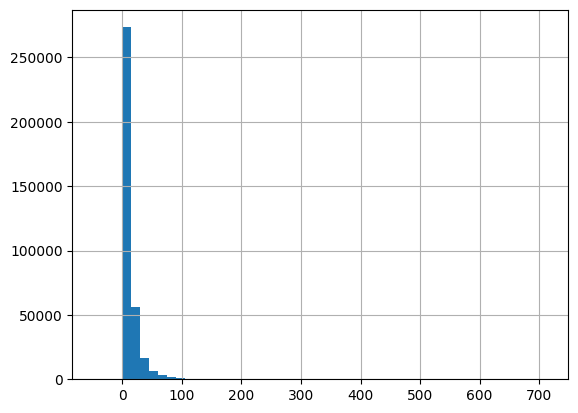

In [16]:
#Graficamos la distribucion
visits['duration_minutes'].hist(bins = 50)

In [17]:
#Vemos si hay algun valor que se repite demasiado
visits['duration_minutes'].value_counts().sort_values(ascending = False)

1.0      53029
0.0      35794
2.0      35748
3.0      26672
4.0      21085
         ...  
369.0        1
314.0        1
250.0        1
278.0        1
270.0        1
Name: duration_minutes, Length: 312, dtype: int64

In [18]:
#Imprimimos a moda mediana ya qeu la media ni la moda son valores representativos
print(visits['duration_minutes'].median())

5.0


In [19]:
#Calculamos la frecuencia en la que los usuarion regresan por semana
frecuencia_regreso_week = visits.groupby(['uid', 'start_ts_year', 'start_ts_week']).agg(n_sesiones=('uid', 'count')).reset_index()
frecuencia_regreso_week.columns = ['uid', 'start_ts_year', 'start_ts_week', 'n_sesiones']
print(frecuencia_regreso_week.sort_values(by='n_sesiones', ascending=False).head(20))


                         uid  start_ts_year  start_ts_week  n_sesiones
212237  12869801667763685675           2018              7          40
212238  12869801667763685675           2018              8          39
212234  12869801667763685675           2018              4          38
212241  12869801667763685675           2018             11          37
212239  12869801667763685675           2018              9          35
212240  12869801667763685675           2018             10          34
101491   6166747268563050393           2018             19          34
212242  12869801667763685675           2018             12          32
212233  12869801667763685675           2018              3          32
212235  12869801667763685675           2018              5          32
212224  12869801667763685675           2017             46          31
101492   6166747268563050393           2018             20          31
212221  12869801667763685675           2017             43          31
53671 

In [20]:
#Calculamos la frecuencia en la que los usuarion regresan por mes
frecuencia_regreso_month = visits.groupby(['uid', 'start_ts_year', 'start_ts_month']).agg(n_sesiones=('uid', 'count')).reset_index()
frecuencia_regreso_month.columns = ['uid', 'start_ts_year', 'start_ts_month', 'n_sesiones']
print(frecuencia_regreso_month.sort_values(by='n_sesiones', ascending=False).head(20))


                         uid  start_ts_year  start_ts_month  n_sesiones
194954  12869801667763685675           2018               2         145
194955  12869801667763685675           2018               3         134
194953  12869801667763685675           2018               1         125
93387    6166747268563050393           2018               5         125
194951  12869801667763685675           2017              11         107
194952  12869801667763685675           2017              12         105
157450  10403169074343195591           2018               1         102
194950  12869801667763685675           2017              10         102
175931  11616947936617491261           2017               9          85
157451  10403169074343195591           2018               2          83
49391    3263486045884611639           2017              12          82
49389    3263486045884611639           2017              10          81
93386    6166747268563050393           2018               4     

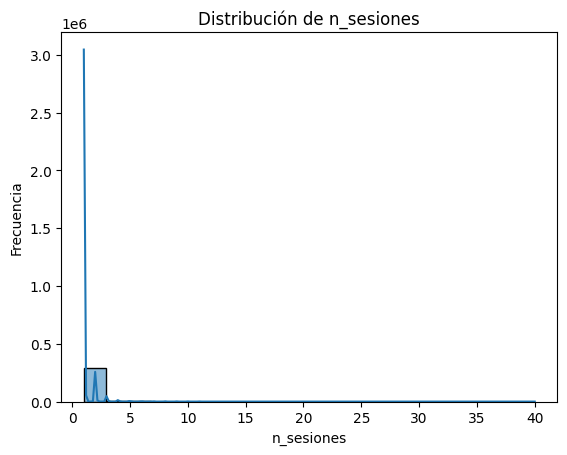

In [21]:
# vemos si existe una distribucion normal el la frecuencia de regreso semanal
sns.histplot(frecuencia_regreso_week['n_sesiones'], kde=True)
plt.title('Distribución de n_sesiones')
plt.xlabel('n_sesiones')
plt.ylabel('Frecuencia')
plt.show()

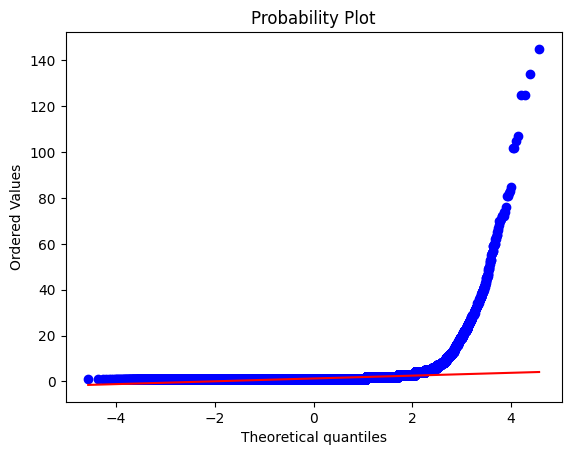

In [22]:
# vemos si existe una distribucion normal en la frecuencia de regreso mensual
stats.probplot(frecuencia_regreso_month['n_sesiones'], dist="norm", plot=plt)
plt.show()

In [23]:
frecuencia_regreso_week.describe()

,uid,start_ts_year,start_ts_week,n_sesiones
count,3.029610e+05,302961.000000,302961.000000,302961.000000
mean,9.201469e+18,2017.453431,26.888441,1.186291
std,5.315565e+18,0.497827,16.703914,0.861595
min,1.186350e+13,2017.000000,1.000000,1.000000
25%,4.602419e+18,2017.000000,11.000000,1.000000
50%,9.215965e+18,2017.000000,26.000000,1.000000
75%,1.379271e+19,2018.000000,43.000000,1.000000
max,1.844668e+19,2018.000000,52.000000,40.000000


In [24]:
print(frecuencia_regreso_week['n_sesiones'].mode())

0    1
dtype: int64


* Se observa que el tiempo promedio de duración de las sesiones es de 5 min, y que las personas regresan al menos 1 vez por semana al menos en el 75% de los clientes

## Analisis de datos de ventas

### Cuándo empieza a comprar la gente?

In [25]:
#calculamos el tiempo que transcurre desde que inicia sesion por primera vez hasta qeu realiza la primera compra,para eso combinmos los df de visits con orders
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [26]:
orders['date'] = orders['buy_ts'].dt.date
print(orders.head())

               buy_ts  revenue                   uid        date
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01


In [27]:
print(visits)

         device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid        date  start_ts_month  start_ts_year  \
0       16879256277535980062  2017-12-20              12           2017   
1        

In [28]:
#combinamos ambos df para tener los tiempos de inicio de sesión y de compra
df_merged = orders.merge(
    visits[['uid', 'date', 'start_ts']],
    on=['uid', 'date'],
    how='left'
)
print(df_merged.head())


               buy_ts  revenue                   uid        date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

             start_ts  
0 2017-06-01 00:09:00  
1 2017-06-01 00:14:00  
2 2017-06-01 00:25:00  
3 2017-06-01 00:14:00  
4 2017-06-01 07:31:00  


In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63683 entries, 0 to 63682
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   buy_ts    63683 non-null  datetime64[ns]
 1   revenue   63683 non-null  float64       
 2   uid       63683 non-null  uint64        
 3   date      63683 non-null  object        
 4   start_ts  55028 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1), uint64(1)
memory usage: 2.9+ MB


In [30]:
# Convertimos la columna date a tipo dato
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63683 entries, 0 to 63682
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   buy_ts    63683 non-null  datetime64[ns]
 1   revenue   63683 non-null  float64       
 2   uid       63683 non-null  uint64        
 3   date      63683 non-null  datetime64[ns]
 4   start_ts  55028 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), uint64(1)
memory usage: 2.9 MB


In [31]:
df_merged.isna().sum()

buy_ts         0
revenue        0
uid            0
date           0
start_ts    8655
dtype: int64

* Existen algunos nulos porque no existe inicio de sesion para algunas fechas de compra,habria que averiguar que pasaron con esos datos,pero por el momento para el análisis eliminamos los nulos ya que no representa un numero muy grande.

In [32]:
#limpiamos los nulos 
df_merged_clean = df_merged.dropna()
df_merged_clean.isna().sum()

buy_ts      0
revenue     0
uid         0
date        0
start_ts    0
dtype: int64

In [33]:
#calculamos el tiempo trancurrido entre la primera sesion y la primera compra
first_buy = df_merged_clean.groupby(['uid'])['start_ts'].min()
first_buy.name = 'first_session'
df_merged_first_session = df_merged_clean.join(first_buy, on = 'uid')
first_compra = df_merged_clean.groupby(['uid'])['buy_ts'].min()
first_compra.name = 'first_compra'
df_merged_first_session_1 = df_merged_first_session.join(first_compra, on = 'uid')
print(df_merged_first_session_1.head())



               buy_ts  revenue                   uid       date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   

             start_ts       first_session        first_compra  
0 2017-06-01 00:09:00 2017-06-01 00:09:00 2017-06-01 00:10:00  
1 2017-06-01 00:14:00 2017-06-01 00:14:00 2017-06-01 00:25:00  
2 2017-06-01 00:25:00 2017-06-01 00:25:00 2017-06-01 00:27:00  
3 2017-06-01 00:14:00 2017-06-01 00:14:00 2017-06-01 00:29:00  
4 2017-06-01 07:31:00 2017-06-01 07:31:00 2017-06-01 07:58:00  


In [34]:
#calculamos el tiempo en que se tarda hacer una compra
df_merged_first_session_1['tiempo_primera_compra_min'] = (df_merged_first_session_1['first_compra']-df_merged_first_session_1['first_session'])/np.timedelta64(1,'m')
df_merged_first_session_1.head(20)

,buy_ts,revenue,uid,date,start_ts,first_session,first_compra,tiempo_primera_compra_min
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:09:00,2017-06-01 00:09:00,2017-06-01 00:10:00,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:14:00,2017-06-01 00:14:00,2017-06-01 00:25:00,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:25:00,2017-06-01 00:25:00,2017-06-01 00:27:00,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:14:00,2017-06-01 00:14:00,2017-06-01 00:29:00,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:31:00,2017-06-01 07:31:00,2017-06-01 07:58:00,27.0
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,2017-06-01 08:43:00,2017-06-01 08:43:00,2017-06-01 08:43:00,0.0
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,2017-06-01 08:51:00,2017-06-01 08:51:00,2017-06-01 08:54:00,3.0
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01 18:34:00,2017-06-01 09:22:00,2017-06-01 09:22:00,0.0
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01 09:22:00,2017-06-01 09:22:00,2017-06-01 09:22:00,0.0
9,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01,2017-06-01 09:18:00,2017-06-01 09:18:00,2017-06-01 09:22:00,4.0


In [35]:
df_merged_first_session_1.describe()

,revenue,uid,tiempo_primera_compra_min
count,55028.000000,5.502800e+04,55028.000000
mean,5.234342,8.995284e+18,44.251854
std,20.322782,5.267097e+18,146.228285
min,0.000000,1.575282e+15,-1400.000000
25%,1.220000,4.440306e+18,2.000000
50%,2.650000,8.854679e+18,8.000000
75%,4.890000,1.355573e+19,29.000000
max,2633.280000,1.844617e+19,1409.000000


* Existen numeros negativos debido a que no existe datos de inicio de sesión de ciertas fechas de compra

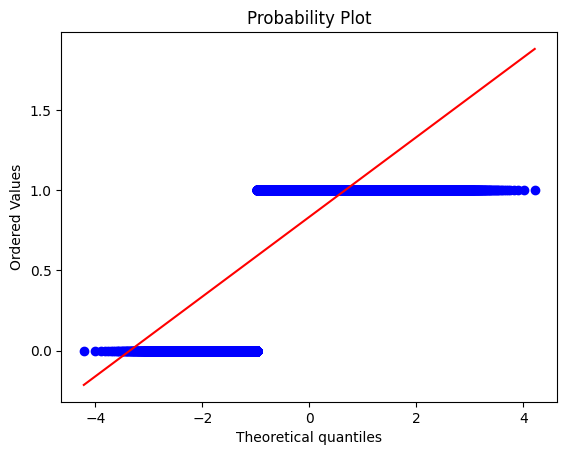

In [36]:
#vemos si representa una distribucion normal,sin tomar en cuenta los numeos negativos
stats.probplot(df_merged_first_session_1['tiempo_primera_compra_min']>0, dist="norm", plot=plt)
plt.show()

In [37]:
#Ya que no existe una distribución normal para poder tomar la media como medida representativa,vemos si existe algún valor que se repite
df_merged_first_session_1['tiempo_primera_compra_min'].value_counts().head(15)

0.0     6647
1.0     4366
2.0     3271
3.0     2732
4.0     2287
5.0     2009
6.0     1984
7.0     1567
9.0     1514
8.0     1282
13.0    1154
10.0     987
12.0     915
14.0     901
11.0     873
Name: tiempo_primera_compra_min, dtype: int64

In [38]:
df_merged_first_session_1['tiempo_primera_compra_min'].median()

8.0

* Concluimos que la mediana es el valor más representativo por lo tanto transcurre alrededor de 8 min para que pueda realizarse la primera compra

## ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [39]:
#Calcularemos la cantidad de pedidos que realiza cada cliente deacuerdo a su ciclo de vida,es decir los pedidos que hacen en su primer mes,segundo mes y asi sustantivamente
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
 3   date     50415 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1), uint64(1)
memory usage: 1.5+ MB


In [40]:
orders['month_year'] = orders['buy_ts'].dt.to_period('M')
orders.head()

,buy_ts,revenue,uid,date,month_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06


In [41]:
orders['month'] = orders['buy_ts'].dt.month
orders['week'] = orders['buy_ts'].dt.isocalendar().week
orders['year'] = orders['buy_ts'].dt.isocalendar().year
orders.head()

,buy_ts,revenue,uid,date,month_year,month,week,year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06,6,22,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06,6,22,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06,6,22,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06,6,22,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06,6,22,2017


In [42]:
# calculamos el ciclo de vida del cliente desde su primera compra
first_orders = orders.groupby('uid')['date'].min().reset_index()
first_orders.columns = ['uid','first_order_date']
first_orders.head()

,uid,first_order_date
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


In [43]:
first_orders['first_month'] = first_orders['first_order_date'].astype('datetime64[M]').dt.to_period('M')
first_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   uid               36523 non-null  uint64   
 1   first_order_date  36523 non-null  object   
 2   first_month       36523 non-null  period[M]
dtypes: object(1), period[M](1), uint64(1)
memory usage: 856.1+ KB


In [44]:
first_orders.head()

,uid,first_order_date,first_month
0,313578113262317,2018-01-03,2018-01
1,1575281904278712,2017-06-03,2017-06
2,2429014661409475,2017-10-11,2017-10
3,2464366381792757,2018-01-28,2018-01
4,2551852515556206,2017-11-24,2017-11


In [45]:
orders_1 = orders.merge(first_orders,on = 'uid',how = 'left')
orders_1.head()

,buy_ts,revenue,uid,date,month_year,month,week,year,first_order_date,first_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06


In [46]:
#calculamos el ciclo de vida del cliente
orders_1['age']= (orders_1['date']-orders_1['first_order_date'])/np.timedelta64(1,'M')
orders_1['age'] = orders_1['age'].round().astype('int')
orders_1.head()

,buy_ts,revenue,uid,date,month_year,month,week,year,first_order_date,first_month,age
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06,0


In [47]:
#calculamos el numero de pedidos,cantidad de compradores ,la ganancia total por edad de los clientes y el tamano promedio de compra
pedidos_por_tiempo = orders_1.groupby('age').agg(numero_pedidos = ('buy_ts','count'),n_buyers = ('uid','nunique'),revenue= ('revenue','sum'),revenue_prom = ('revenue','mean')).reset_index()
pedidos_por_tiempo['pedidos_prom'] = pedidos_por_tiempo['numero_pedidos']/pedidos_por_tiempo['n_buyers']
pedidos_por_tiempo['retencion_pct'] = pedidos_por_tiempo['n_buyers'].pct_change() * 100
pedidos_por_tiempo.head(15)

,age,numero_pedidos,n_buyers,revenue,revenue_prom,pedidos_prom,retencion_pct
0,0,41847,36523,178180.79,4.257911,1.145771,NaN
1,1,2117,1086,13367.29,6.314261,1.949355,-97.026531
2,2,1544,835,13464.74,8.720687,1.849102,-23.112339
3,3,1202,599,19461.13,16.190624,2.006678,-28.263473
4,4,887,485,7442.73,8.390902,1.828866,-19.031720
5,5,715,375,6143.01,8.591622,1.906667,-22.680412
6,6,697,340,4040.92,5.797590,2.050000,-9.333333
7,7,493,221,3292.98,6.679473,2.230769,-35.000000
8,8,404,176,2655.51,6.573045,2.295455,-20.361991
9,9,246,96,1895.61,7.705732,2.562500,-45.454545


In [48]:
#Para comparar sacamos en tamano promedio de compra a nivel general
tamaño_promedio = orders['revenue'].mean()
print("Tamaño promedio de compra:", tamaño_promedio)


Tamaño promedio de compra: 4.999646930477041


*Vemos que la cantidad de pedidos por cliente va aumentando a medida pasa el tiempo,pero la cantidad de clientes va disminuyendo con el tiempo también,el primer mes existe una tasa de retención muy baja, el 97% de los clientes nuevos que ingresan no vuelven el segundo mes.

## ¿Cuánto dinero traen? (LTV)

In [49]:
#Calculamos el ltv para los clientes nuevos que se adquiere cada mes
clientes_nuevos = orders_1[orders_1['date'] == orders_1['first_order_date']]
clientes_nuevos.head()

,buy_ts,revenue,uid,date,month_year,month,week,year,first_order_date,first_month,age
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06,6,22,2017,2017-06-01,2017-06,0


In [50]:
# Ordenar por fecha de compra
orders_sorted = orders_1.sort_values(by=['uid', 'date'])

# Filtrar la primera compra de cada usuario
clientes_nuevos = orders_sorted.drop_duplicates(subset='uid', keep='first')
clientes_nuevos.head()

,buy_ts,revenue,uid,date,month_year,month,week,year,first_order_date,first_month,age
27944,2018-01-03 21:51:00,0.55,313578113262317,2018-01-03,2018-01,1,1,2018,2018-01-03,2018-01,0
213,2017-06-03 10:13:00,1.22,1575281904278712,2017-06-03,2017-06,6,22,2017,2017-06-03,2017-06,0
12235,2017-10-11 18:33:00,73.33,2429014661409475,2017-10-11,2017-10,10,41,2017,2017-10-11,2017-10,0
31462,2018-01-28 15:54:00,2.44,2464366381792757,2018-01-28,2018-01,1,4,2018,2018-01-28,2018-01,0
19140,2017-11-24 10:14:00,6.32,2551852515556206,2017-11-24,2017-11,11,47,2017,2017-11-24,2017-11,0


In [51]:
clientes_nuevos.info()
clientes_nuevos = clientes_nuevos.drop_duplicates()
clientes_nuevos['uid'].nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 27944 to 13176
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   buy_ts            36523 non-null  datetime64[ns]
 1   revenue           36523 non-null  float64       
 2   uid               36523 non-null  uint64        
 3   date              36523 non-null  object        
 4   month_year        36523 non-null  period[M]     
 5   month             36523 non-null  int64         
 6   week              36523 non-null  UInt32        
 7   year              36523 non-null  UInt32        
 8   first_order_date  36523 non-null  object        
 9   first_month       36523 non-null  period[M]     
 10  age               36523 non-null  int64         
dtypes: UInt32(2), datetime64[ns](1), float64(1), int64(2), object(2), period[M](2), uint64(1)
memory usage: 3.1+ MB


36523

In [52]:
revenue_por_usuario = clientes_nuevos.groupby(['month_year','uid'])['revenue'].sum().reset_index()
revenue_por_usuario.columns = ['month_year','uid','revenue']
revenue_por_usuario.head()

,month_year,uid,revenue
0,2017-06,1575281904278712,1.22
1,2017-06,16233238570251706,1.65
2,2017-06,29085576454138824,3.36
3,2017-06,31782048561502182,6.11
4,2017-06,50884319066603964,0.98


In [53]:
ltv = revenue_por_usuario.groupby('month_year')['revenue'].mean().reset_index()
ltv.columns = ['month_year','LTV']
ltv.head(15)

,month_year,LTV
0,2017-06,3.984340
1,2017-07,5.119423
2,2017-08,4.626474
3,2017-09,4.481806
4,2017-10,4.145707
5,2017-11,4.168978
6,2017-12,4.140700
7,2018-01,3.675612
8,2018-02,3.718337
9,2018-03,3.921995


In [54]:
ltv['LTV'].mean()

4.144432978591013

* El ltv desde 2017-06 hasta 2018-06 es 4.144

## Analisis de marketing

### ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [55]:
#anadimos una columna donde muestres solo el mes y año
cost['month_year'] = cost['dt'].dt.to_period('M')
cost.head()


,source_id,dt,costs,month_year
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [56]:
total_source_month = cost.groupby(['month_year','source_id'])['costs'].sum().reset_index()
total_source_month.columns = ['month_year','source_id','cost']
total_source_month.head(10)


,month_year,source_id,cost
0,2017-06,1,1125.61
1,2017-06,2,2427.38
2,2017-06,3,7731.65
3,2017-06,4,3514.80
4,2017-06,5,2616.12
5,2017-06,9,285.22
6,2017-06,10,314.22
7,2017-07,1,1072.88
8,2017-07,2,2333.11
9,2017-07,3,7674.37


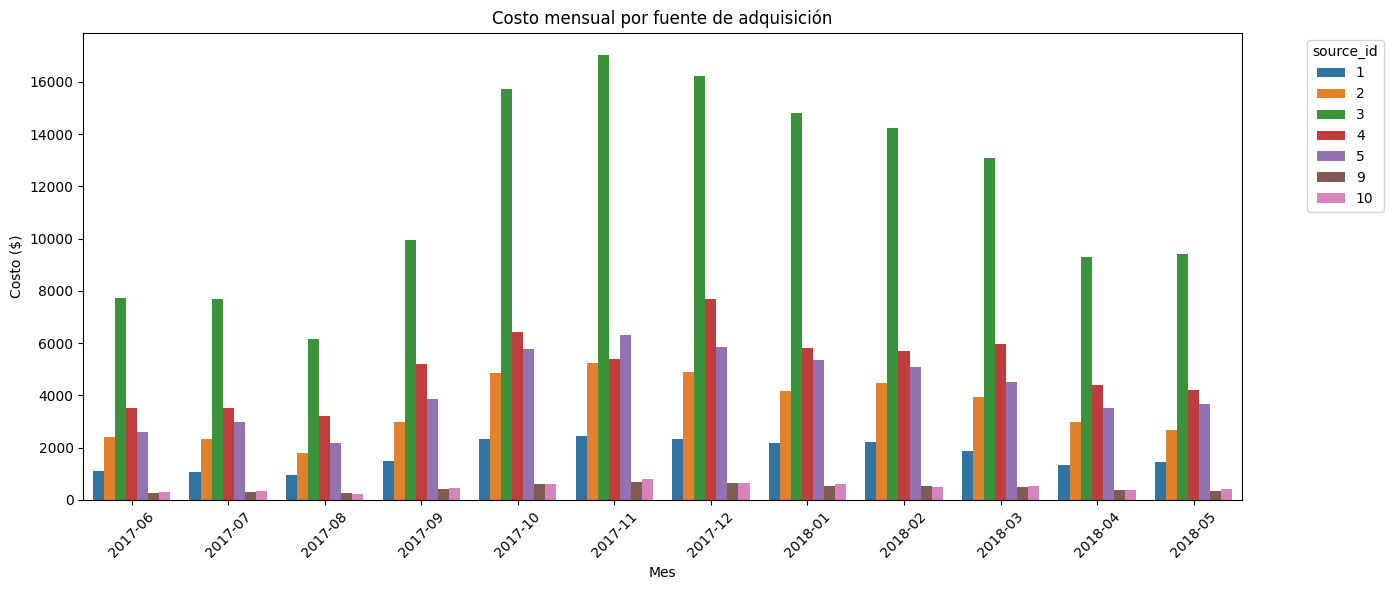

In [57]:
plt.figure(figsize=(14, 6))
sns.barplot(data=total_source_month, x='month_year', y='cost', hue='source_id')
plt.title('Costo mensual por fuente de adquisición')
plt.xlabel('Mes')
plt.ylabel('Costo ($)')
plt.xticks(rotation=45)
plt.legend(title='source_id', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* Las fuentes en las que más se ivierte dinero son la 3 y la 4

 ## ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [58]:
#Unimos el df de clientes nuevos con visits para obtener el source_id de cada cliente
clientes_nuevos_source = clientes_nuevos.merge(visits[['uid','source_id']],on ='uid',how = 'left')
clientes_nuevos_source.head()

,buy_ts,revenue,uid,date,month_year,month,week,year,first_order_date,first_month,age,source_id
0,2018-01-03 21:51:00,0.55,313578113262317,2018-01-03,2018-01,1,1,2018,2018-01-03,2018-01,0,2
1,2018-01-03 21:51:00,0.55,313578113262317,2018-01-03,2018-01,1,1,2018,2018-01-03,2018-01,0,2
2,2018-01-03 21:51:00,0.55,313578113262317,2018-01-03,2018-01,1,1,2018,2018-01-03,2018-01,0,2
3,2017-06-03 10:13:00,1.22,1575281904278712,2017-06-03,2017-06,6,22,2017,2017-06-03,2017-06,0,10
4,2017-06-03 10:13:00,1.22,1575281904278712,2017-06-03,2017-06,6,22,2017,2017-06-03,2017-06,0,10


In [59]:
#calculamos la cantidad de compradores y la ganancia por mes y source
revenue_month_source = clientes_nuevos_source.groupby(['source_id','month_year']).agg(n_buyers = ('uid','count'),revenue = ('revenue','sum')) .reset_index()
revenue_month_source.head(20)

,source_id,month_year,n_buyers,revenue
0,1,2017-06,2744,12323.65
1,1,2017-07,1105,6960.23
2,1,2017-08,925,5184.51
3,1,2017-09,1294,11467.14
4,1,2017-10,1359,11203.45
5,1,2017-11,2130,16058.50
6,1,2017-12,1577,5049.21
7,1,2018-01,1134,10087.51
8,1,2018-02,1133,3884.40
9,1,2018-03,1329,7854.26


In [60]:
cost.head()

,source_id,dt,costs,month_year
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [61]:
cost_month = cost.groupby(['source_id','month_year'])['costs'].sum().reset_index()
cost_month.head(20)

,source_id,month_year,costs
0,1,2017-06,1125.61
1,1,2017-07,1072.88
2,1,2017-08,951.81
3,1,2017-09,1502.01
4,1,2017-10,2315.75
5,1,2017-11,2445.16
6,1,2017-12,2341.20
7,1,2018-01,2186.18
8,1,2018-02,2204.48
9,1,2018-03,1893.09


In [62]:
#juntamos ambos df para obtener los gstos por fuente y mes
revenue_month_source = revenue_month_source.merge(cost_month[['source_id','month_year','costs']],on =['source_id','month_year'],how ='left')
revenue_month_source.head()

,source_id,month_year,n_buyers,revenue,costs
0,1,2017-06,2744,12323.65,1125.61
1,1,2017-07,1105,6960.23,1072.88
2,1,2017-08,925,5184.51,951.81
3,1,2017-09,1294,11467.14,1502.01
4,1,2017-10,1359,11203.45,2315.75


In [63]:
#calculamos el CAC
revenue_month_source['CAC'] = revenue_month_source['costs']/revenue_month_source['n_buyers']
revenue_month_source.head()

,source_id,month_year,n_buyers,revenue,costs,CAC
0,1,2017-06,2744,12323.65,1125.61,0.410208
1,1,2017-07,1105,6960.23,1072.88,0.970932
2,1,2017-08,925,5184.51,951.81,1.028984
3,1,2017-09,1294,11467.14,1502.01,1.160750
4,1,2017-10,1359,11203.45,2315.75,1.704010


 ## 3. ¿Cuán rentables eran las inversiones? (ROMI)

In [64]:
#calculamos el ltv por mes y por fuente,como no tenemos un margen que nos indique cuanto es la ganancia bruta,no tomaremos en cuenta ese factor
revenue_month_source['LTV'] = revenue_month_source['revenue']/revenue_month_source['n_buyers']

In [65]:
#calculamos el ROMI
revenue_month_source['ROMI'] = revenue_month_source['LTV']/revenue_month_source['CAC']
revenue_month_source['diferencia'] = revenue_month_source['LTV'] - revenue_month_source['CAC']
revenue_month_source.head()

,source_id,month_year,n_buyers,revenue,costs,CAC,LTV,ROMI,diferencia
0,1,2017-06,2744,12323.65,1125.61,0.410208,4.491126,10.948419,4.080918
1,1,2017-07,1105,6960.23,1072.88,0.970932,6.298851,6.487426,5.327919
2,1,2017-08,925,5184.51,951.81,1.028984,5.604876,5.447001,4.575892
3,1,2017-09,1294,11467.14,1502.01,1.160750,8.861777,7.634530,7.701028
4,1,2017-10,1359,11203.45,2315.75,1.704010,8.243893,4.837936,6.539882


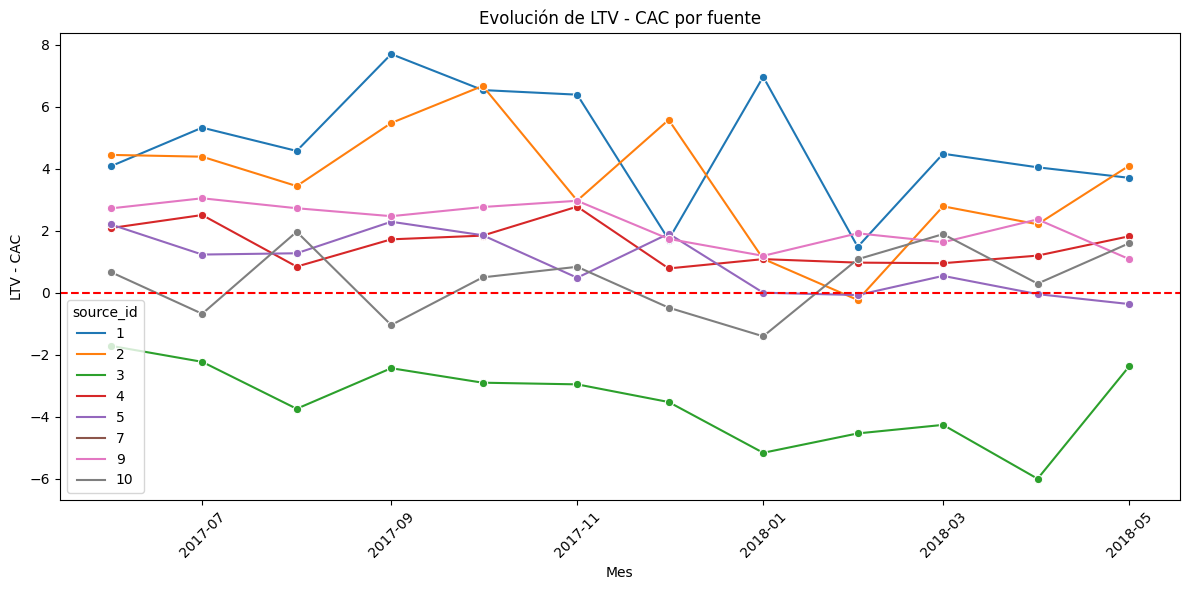

In [85]:
palette = sns.color_palette("tab10",8)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=revenue_month_source,
    x='month_year',
    y='diferencia',
    hue='source_id',
    marker='o',
    palette = palette
)

# Personalización
plt.title('Evolución de LTV - CAC por fuente')
plt.xlabel('Mes')
plt.ylabel('LTV - CAC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.axhline(0, color='red', linestyle='--', linewidth=1.5, label='LTV = CAC')

plt.show()

La diferencia de a fuente 3 siempre se encuentra en números negativos

In [86]:
#Vemos el LTV de la fuente 3, para calcular cuanto falta para poder llegar al equilibrio y no exista pérdidas
revenue_month_source[revenue_month_source['source_id'] == 3]

,source_id,month_year,n_buyers,revenue,costs,CAC,LTV,ROMI,diferencia
24,3,2017-06-01,1236,5618.29,7731.65,6.255380,4.545542,0.726661,-1.709838
25,3,2017-07-01,986,5478.73,7674.37,7.783337,5.556521,0.713900,-2.226815
26,3,2017-08-01,717,3460.96,6143.54,8.568396,4.827001,0.563349,-3.741395
27,3,2017-09-01,1359,6657.95,9963.55,7.331531,4.899154,0.668231,-2.432377
28,3,2017-10-01,2122,9583.76,15737.24,7.416230,4.516381,0.608986,-2.899849
29,3,2017-11-01,2252,10374.25,17025.34,7.560098,4.606683,0.609342,-2.953415
30,3,2017-12-01,2232,8355.13,16219.52,7.266810,3.743338,0.515128,-3.523472
31,3,2018-01-01,1584,6633.36,14808.78,9.348977,4.187727,0.447934,-5.161250
32,3,2018-02-01,1731,6376.56,14228.56,8.219850,3.683744,0.448152,-4.536106
33,3,2018-03-01,1595,6285.15,13080.85,8.201160,3.940533,0.480485,-4.260627


* Vemos que se necesitaria adquirir un cliente más por lo menos cada mes para no generar pérdidas

In [66]:
#vemos que fuente trae mas ganancias
df_grouped = revenue_month_source.groupby('source_id', as_index=False).sum(numeric_only=True)
df_grouped.sort_values(by ='revenue', ascending = False).head(10)


,source_id,n_buyers,revenue,costs,CAC,LTV,ROMI,diferencia
1,2,19063,116402.07,42806.04,29.687019,72.636761,34.224678,42.949742
0,1,16153,98367.82,20833.27,17.143087,74.169846,60.542809,57.026759
3,4,22011,95848.33,61073.60,35.496461,57.530015,18.943822,18.613554
2,3,18001,78926.60,141321.63,95.384788,53.564601,6.860378,-41.820187
4,5,14808,66769.74,51757.10,42.005411,53.332995,15.854603,11.327584
6,9,4794,16528.90,5517.49,16.356060,43.000781,37.068101,26.644721
7,10,2563,7521.04,5822.49,31.592502,36.836334,15.799092,5.243832
5,7,1,1.22,0.00,0.000000,1.220000,0.000000,0.000000


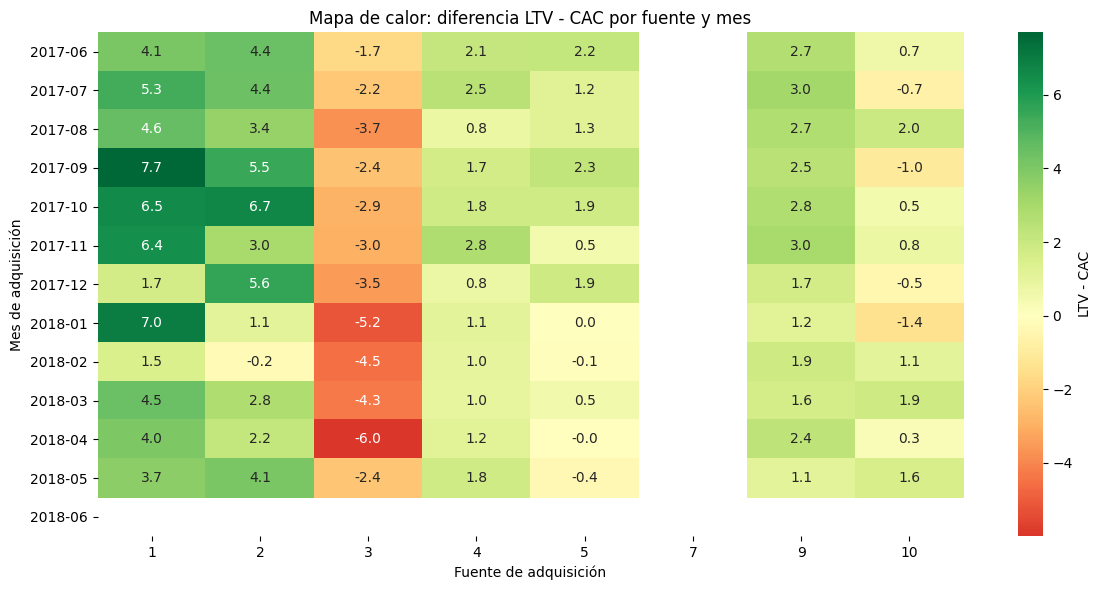

In [67]:
revenue_month_source['diferencia'] = revenue_month_source['LTV'] - revenue_month_source['CAC']

heatmap_data = revenue_month_source.pivot(index='month_year', columns='source_id', values='diferencia')
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="RdYlGn",  # verde = positivo (rentable), rojo = negativo (pérdida)
    center=0,       # rojo por debajo de 0
    cbar_kws={'label': 'LTV - CAC'}
)
plt.title("Mapa de calor: diferencia LTV - CAC por fuente y mes")
plt.xlabel("Fuente de adquisición")
plt.ylabel("Mes de adquisición")
plt.tight_layout()
plt.show()


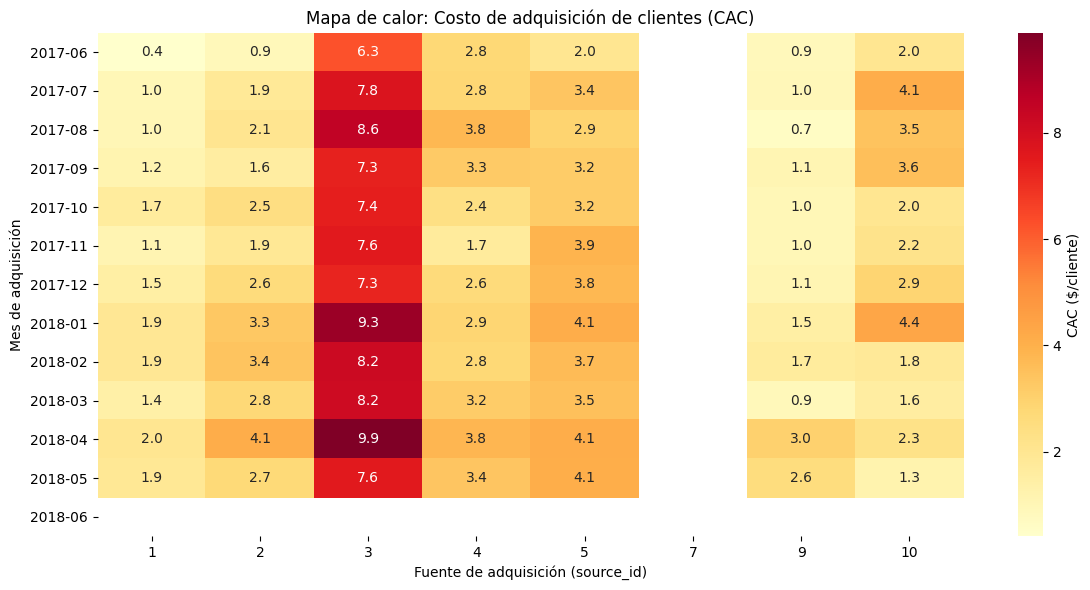

In [68]:
heatmap_cac = revenue_month_source.pivot(index='month_year', columns='source_id', values='CAC')
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_cac,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",  # amarillo → rojo (más alto = más caro)
    cbar_kws={'label': 'CAC ($/cliente)'}
)
plt.title("Mapa de calor: Costo de adquisición de clientes (CAC)")
plt.xlabel("Fuente de adquisición (source_id)")
plt.ylabel("Mes de adquisición")
plt.tight_layout()
plt.show()

In [69]:
visits.head()

,device,end_ts,source_id,start_ts,uid,date,start_ts_month,start_ts_year,start_ts_week,duration_minutes
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,12,2017,51,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2,2018,8,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,7,2017,26,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,5,2018,20,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,12,2017,52,0.0


In [70]:
#Graficamos la cantidad de visitas por device a lo largo del tiempo
visits['month_year'] = visits['start_ts'].dt.to_period('M')
device_visits = visits.groupby(['month_year','device'])['start_ts'].count().reset_index()
device_visits.head()

,month_year,device,start_ts
0,2017-06,desktop,12358
1,2017-06,touch,4147
2,2017-07,desktop,12950
3,2017-07,touch,4878
4,2017-08,desktop,10854


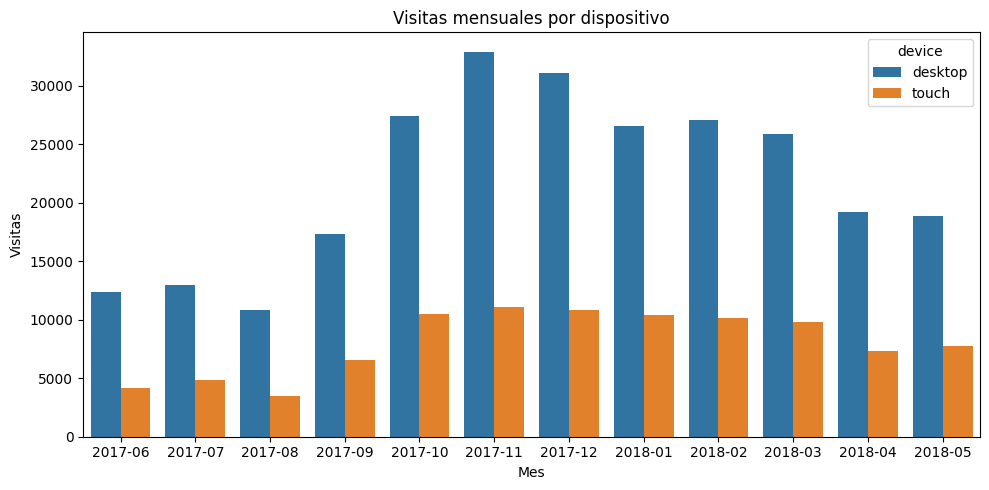

In [71]:
plt.figure(figsize=(10, 5))
sns.barplot(data=device_visits, x='month_year', y='start_ts', hue='device')
plt.title("Visitas mensuales por dispositivo")
plt.ylabel("Visitas")
plt.xlabel("Mes")
plt.tight_layout()
plt.show()

In [72]:
#Graficamos la cantidad de visitas por fuente a lo largo del tiempo
source_visits = visits.groupby(['month_year','source_id'])['start_ts'].count().reset_index()
source_visits['month_year'] = source_visits['month_year'].dt.to_timestamp()
source_visits.head(15)

,month_year,source_id,start_ts
0,2017-06-01,1,1544
1,2017-06-01,2,2191
2,2017-06-01,3,4435
3,2017-06-01,4,3911
4,2017-06-01,5,3122
5,2017-06-01,7,2
6,2017-06-01,9,823
7,2017-06-01,10,477
8,2017-07-01,1,1641
9,2017-07-01,2,2488


In [73]:
source_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month_year  102 non-null    datetime64[ns]
 1   source_id   102 non-null    int64         
 2   start_ts    102 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.5 KB


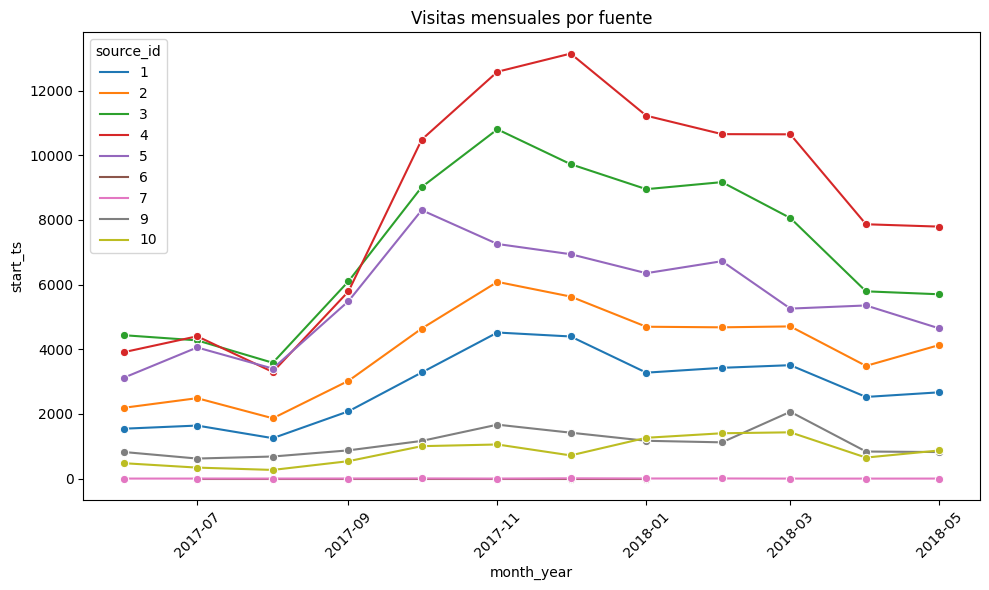

In [74]:

palette = sns.color_palette("tab10",9)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=source_visits,
    x='month_year',
    y='start_ts',
    hue='source_id',
    palette=palette, 
    marker='o'
)
plt.title("Visitas mensuales por fuente")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusiones

Se analizaron 3 dataset,una con registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018,otra con un archivo con los pedidos en este periodo y por ultimo un df con los gastos de marketing,después de analizarlos se concluye:

* No existe diferencia significatia en la cantidad de sesiones iniciadas por semana y la cantidad de clientes,ya que el 75% de los clientes inicia sesión una vez por semnana en promedio,se tiene alrededor de 908 personas que ingresan por día,5716 personas por semana y 23228 personas por mes.
* En promedio la duración de la sesión es de aproximadamente 5 min y el tiempo trancurrido para la primera compra en promedio es menor a 1 dia.
* Vemos que la cantidad de pedidos por cliente va aumentando a medida pasa el tiempo,pero la cantidad de clientes va disminuyendo con el tiempo también,el primer mes existe una tasa de retención muy baja, el 97% de los clientes nuevos que ingresan no vuelven el segundo mes.
* La fuente más rentable es la 1 ya que tiene un ROMI de 60 y el segundo más rentable es la fuente 9.
* La cantidad de clientes adquiridos por la fuente 3 no son suficientes,a pesar de ser la fuente en la que más se invirtió en marketing ,es la fuente que está generando  pérdidas, existe una diferencia de 41.82 entre el LTV y CAC,se tiene que adquirir por lo menos los ingresos de 1 cliente por mes para no generar pérdidas.
* Existe una mayor cantidad de visitas durante los meses de noviembre-2017 hasta febrero de 2018,también se concluye que las fuentes que más visitas generan son la fuente 4,seguida de la 3.

